In [821]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("TSLA_2022_2023.csv", delimiter = ",")

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
'''
CHOICE OF ALGORITHM
For this assignment we've chosen to use linear regression.
This is because linear regression is the only of the two proposed methods
that can return a stock price (which is the given assignment)
It is better at predicting quantifiable data over
time and into the future as opposed to classification.

'''

In [822]:
'''
I've decided to use the data from Oct 30, 2022 - Oct 30, 2023.
This is because we went through a pandemic, and early Tesla stock prices
might actually give me a worse result.

Example: Including all the prices from before 2019 might make our predictions
tend toward lower prices since we'll have a huge amount of our data that shows
very low stock prices.
This is one of the weaknesses of linear regression, as it may struggle to
capture the many nonlinear and time-dependent aspects of the stock market.
'''

"\nI've decided to use the data from Oct 30, 2022 - Oct 30, 2023.\nThis is because we went through a pandemic, and early Tesla stock prices\nmight actually give me a worse result.\n\nExample: Including all the prices from before 2019 might make our predictions\ntend toward lower prices since we'll have a huge amount of our data that shows\nvery low stock prices.\nThis is one of the weaknesses of linear regression, as it may struggle to\ncapture the many nonlinear and time-dependent aspects of the stock market.\n"

In [823]:
# Quick look at our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [824]:
# Converting date to a datetime dtype
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


<Axes: title={'center': 'Close/Adj Close relationship'}, xlabel='Close', ylabel='Adj Close'>

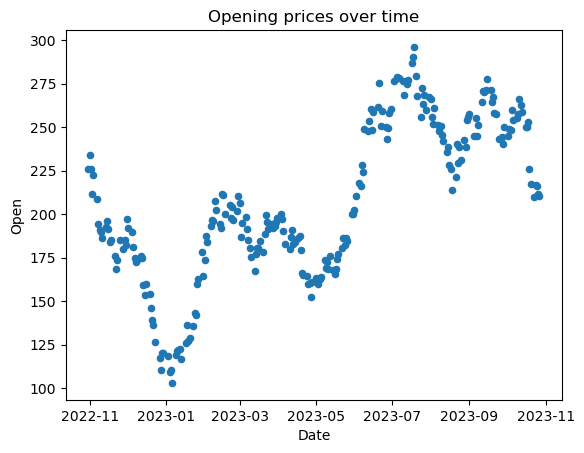

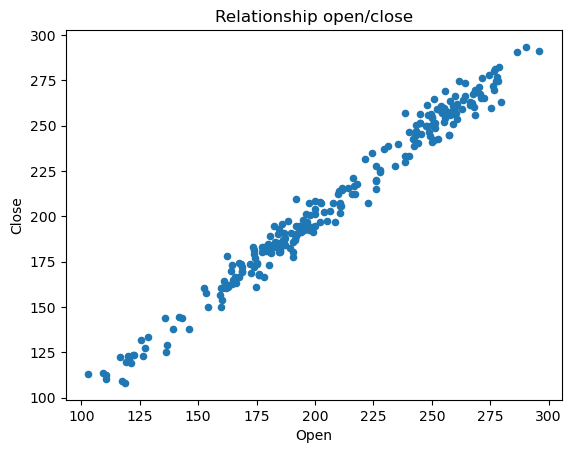

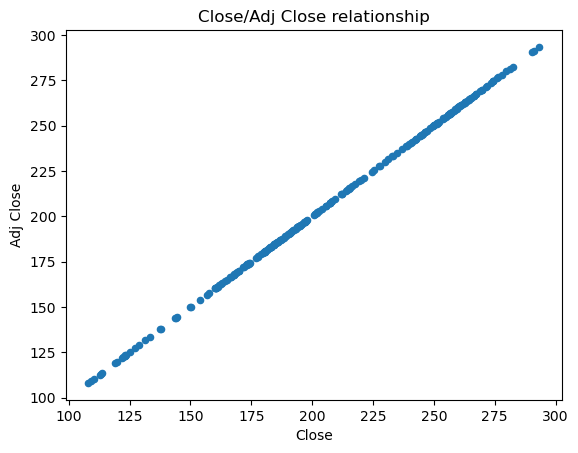

In [825]:
# Quick look at our data
df.plot(kind="scatter", x = "Date", y = "Open", title="Opening prices over time")
df.plot(kind="scatter", x = "Open", y = "Close", title = "Relationship open/close", xlabel = "Open", ylabel = "Close")

# Want to check whether Adj Close is useful data
df.plot(kind="scatter", x = "Close", y = "Adj Close", title = "Close/Adj Close relationship")

In [826]:
# Checking whether Adj Close deviates from close by more than 0.1 cents in value
AdjProximity = 0
for i in range(len(df["Close"])):
    if df["Adj Close"][i] < df["Close"][i] - 0.001 or df["Adj Close"][i] > df["Close"][i] + 0.001:
        AdjProximity = AdjProximity + 1

AdjProximity

0

In [827]:
# Adj Close does not seem to be a useful variable (duplicate), we can remove it
if (not AdjProximity):
    df.drop(columns="Adj Close")

In [828]:
# Want to make a new quantifiable datapoint for days/date
df["Days"] = df["Date"] - df["Date"][0]
df["DaysInt"] = 0
for i in range(len(df["Days"])):
    df["DaysInt"][i] = df["Days"][i].days # From timedelta to int

df.info()

/tmp/ipykernel_3953/2057248798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DaysInt"][i] = df["Days"][i].days # From timedelta to int
/tmp/ipykernel_3953/2057248798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DaysInt"][i] = df["Days"][i].days # From timedelta to int
/tmp/ipykernel_3953/2057248798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DaysInt"][i] = df["Days"][i].days # From timedelta to int
/tmp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       250 non-null    datetime64[ns] 
 1   Open       250 non-null    float64        
 2   High       250 non-null    float64        
 3   Low        250 non-null    float64        
 4   Close      250 non-null    float64        
 5   Adj Close  250 non-null    float64        
 6   Volume     250 non-null    int64          
 7   Days       250 non-null    timedelta64[ns]
 8   DaysInt    250 non-null    int64          
dtypes: datetime64[ns](1), float64(5), int64(2), timedelta64[ns](1)
memory usage: 17.7 KB


In [829]:
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Days,DaysInt
230,2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400,336 days,336
231,2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300,337 days,337
232,2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600,338 days,338
233,2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200,339 days,339
234,2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000,340 days,340
235,2023-10-09,255.309998,261.359985,252.050003,259.670013,259.670013,101377900,343 days,343
236,2023-10-10,257.750000,268.940002,257.649994,263.619995,263.619995,122656000,344 days,344
237,2023-10-11,266.200012,268.600006,260.899994,262.989990,262.989990,103706300,345 days,345
238,2023-10-12,262.920013,265.410004,256.630005,258.869995,258.869995,111508100,346 days,346
239,2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800,347 days,347


MAE = 4.777912467359847
MSE = 37.765237137239744


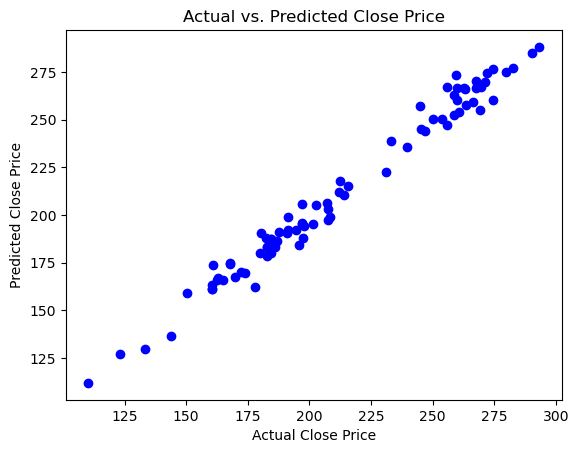

In [830]:
# Making Model A that uses the day and a given opening price
# Simple model for same-day predictions

xa = df[["DaysInt", "Open"]]
ya = df["Close"]

xa_train, xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.33, random_state=42)

model_a = LinearRegression()
model_a.fit(xa_train, ya_train)

ya_pred = model_a.predict(xa_test)

mae_a = metrics.mean_absolute_error(ya_test, ya_pred)
mse_a = metrics.mean_squared_error(ya_test, ya_pred)

print(f"MAE = {mae_a}")
print(f"MSE = {mse_a}")

plt.scatter(ya_test, ya_pred, color='blue')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.show()

In [831]:
# Want to add new features - the month, week, and day of the week might make meaningful data
df["Weekday"] = 0
df["Month"] = 0
df["WeekOfYear"] = 0

for i in range(len(df["Date"])):
    df["Month"][i] = df["Date"][i].month
    df["WeekOfYear"][i] = df["Date"][i].weekofyear
    df["Weekday"][i] = df["Date"][i].day_of_week

# Later I want to try adding a feature OpenCloseRatio to see whether it will improve my model

# Turning month, week of year and weekday into categorical variables
df["Month"] = df["Month"].astype("category")
df["WeekOfYear"] = df["WeekOfYear"].astype("category")
df["Weekday"] = df["Weekday"].astype("category")

df.tail(20)

/tmp/ipykernel_3953/476917511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"][i] = df["Date"][i].month
/tmp/ipykernel_3953/476917511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WeekOfYear"][i] = df["Date"][i].weekofyear
/tmp/ipykernel_3953/476917511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weekday"][i] = df["Date"][i].day_of_week
/tmp/ipykernel_3953/476917511.py:7: SettingWithCopyWarning: 
A v

,Date,Open,High,Low,Close,Adj Close,Volume,Days,DaysInt,Weekday,Month,WeekOfYear
230,2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400,336 days,336,0,10,40
231,2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300,337 days,337,1,10,40
232,2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600,338 days,338,2,10,40
233,2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200,339 days,339,3,10,40
234,2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000,340 days,340,4,10,40
235,2023-10-09,255.309998,261.359985,252.050003,259.670013,259.670013,101377900,343 days,343,0,10,41
236,2023-10-10,257.750000,268.940002,257.649994,263.619995,263.619995,122656000,344 days,344,1,10,41
237,2023-10-11,266.200012,268.600006,260.899994,262.989990,262.989990,103706300,345 days,345,2,10,41
238,2023-10-12,262.920013,265.410004,256.630005,258.869995,258.869995,111508100,346 days,346,3,10,41
239,2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800,347 days,347,4,10,41


In [832]:
# Checking that Weekday, Month, etc have been converted to categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Date        250 non-null    datetime64[ns] 
 1   Open        250 non-null    float64        
 2   High        250 non-null    float64        
 3   Low         250 non-null    float64        
 4   Close       250 non-null    float64        
 5   Adj Close   250 non-null    float64        
 6   Volume      250 non-null    int64          
 7   Days        250 non-null    timedelta64[ns]
 8   DaysInt     250 non-null    int64          
 9   Weekday     250 non-null    category       
 10  Month       250 non-null    category       
 11  WeekOfYear  250 non-null    category       
dtypes: category(3), datetime64[ns](1), float64(5), int64(2), timedelta64[ns](1)
memory usage: 21.5 KB


MAE = 4.682732431414178
MSE = 36.26045737112874


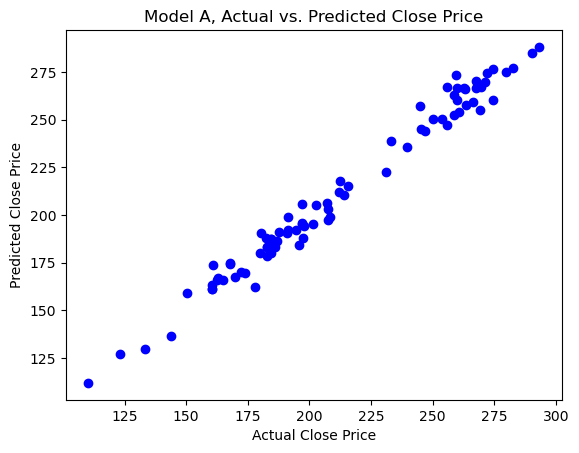

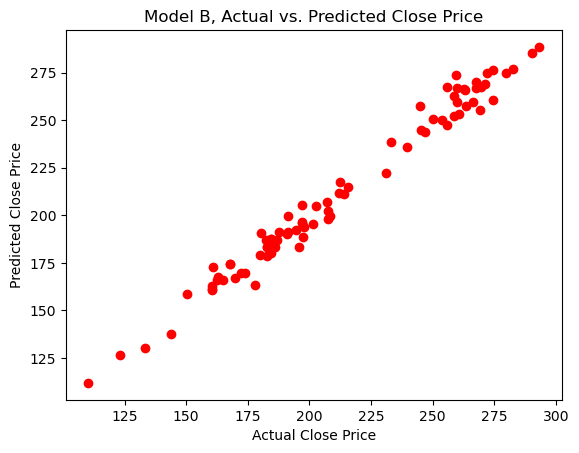

In [833]:
# Making variable list for model B, same procedure as every year James
# Now including new categorical variables weekday, weekofyear, and month
xb = df[["DaysInt", "Weekday", "WeekOfYear", "Month", "Open"]]
yb = df["Close"]

xb_train, xb_test, yb_train, yb_test = train_test_split(xb, yb, test_size=0.33, random_state=42)

model_b = LinearRegression()
model_b.fit(xb_train, yb_train)

yb_pred = model_b.predict(xb_test)

mae_b = metrics.mean_absolute_error(yb_test, yb_pred)
mse_b = metrics.mean_squared_error(yb_test, yb_pred)

print(f"MAE = {mae_b}")
print(f"MSE = {mse_b}")

plt.scatter(ya_test, ya_pred, color="blue")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Model A, Actual vs. Predicted Close Price")
plt.show()

plt.scatter(yb_test, yb_pred, color="red")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Model B, Actual vs. Predicted Close Price")
plt.show()


In [834]:
xa_test

,DaysInt,Open
142,206,186.539993
6,8,194.020004
97,142,199.300003
60,88,162.429993
112,164,182.960007
...,...,...
79,116,196.330002
86,127,191.380005
5,7,208.649994
56,84,135.869995


In [835]:
def predictPrice(date, openPrice, model):
    date = pd.to_datetime(date)
    if (model == model_a):
        predInput = pd.DataFrame({
            "DaysInt":  [(date - df["Date"][0]).days],
            "Open":     [210.600006]
        })
    
    if (model == model_b):
        predInput = pd.DataFrame({
            "DaysInt":      [(date - df["Date"][0]).days],
            "Weekday":      [date.day_of_week],
            "WeekOfYear":   [date.weekofyear],
            "Month":        [date.month],
            "Open":         [openPrice]
        })
        
    return model.predict(predInput)[0]

#"DaysInt", "Open", "Close", "Weekday", "High", "Low"

In [836]:
openPrice = 207.600006

date = "2023-11-02"

print(f"Predicted price with model a for {date}:")
print(predictPrice(date, openPrice, model_a))
print(f"MAE = {mae_a}, MSE = {mse_a}")
print("-"*20)
print(f"Predicted price with model b for {date}:")
print(predictPrice(date, openPrice, model_b))
print(f"MAE = {mae_b}, MSE = {mse_b}")


Predicted price with model a for 2023-11-02:
212.68243298245278
MAE = 4.777912467359847, MSE = 37.765237137239744
--------------------
Predicted price with model b for 2023-11-02:
208.517573982751
MAE = 4.682732431414178, MSE = 36.26045737112874


In [837]:
df["PrevClose"] = 0 # Perhaps showing what the market closed on for the previous date helps

for i in range(1, len(df["Close"])):
    df["PrevClose"][i] = df["Close"][i-1]

df["PrevClose"].head()

/tmp/ipykernel_3953/1595929041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PrevClose"][i] = df["Close"][i-1]


0      0.000000
1    227.539993
2    227.820007
3    214.979996
4    215.309998
Name: PrevClose, dtype: float64

In [838]:
# Model C, where previous close price is added
xc = df[["DaysInt", "Weekday", "WeekOfYear", "Month", "Open", "PrevClose"]]
yc = df["Close"]

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.33, random_state=42)

model_c = LinearRegression()
model_c.fit(xc_train, yc_train)

yc_pred = model_c.predict(xc_test)

mae_c = metrics.mean_absolute_error(yc_test, yc_pred)
mse_c = metrics.mean_squared_error(yc_test, yc_pred)


In [839]:
# Model D, using as a benchmark
xd = df["DaysInt"].array.reshape(-1, 1)
yd = df["Close"]

xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size=0.33, random_state=42)

model_d = LinearRegression()
model_d.fit(xd_train, yd_train)

yd_pred = model_d.predict(xd_test)

mae_d = metrics.mean_absolute_error(yd_test, yd_pred)
mse_d = metrics.mean_squared_error(yd_test, yd_pred)

In [840]:
# Just to make checking easier and faster
def predictPrice(date, openPrice, model):
    date = pd.to_datetime(date)

    # Making input
    if (model == model_a):
        predInput = pd.DataFrame({
            "DaysInt":      [(date - df["Date"][0]).days],
            "Open":         [openPrice]
        })
    
    if (model == model_b):
        predInput = pd.DataFrame({
            "DaysInt":      [(date - df["Date"][0]).days],
            "Weekday":      [date.day_of_week],
            "WeekOfYear":   [date.weekofyear],
            "Month":        [date.month],
            "Open":         [openPrice]
        })
    
    if (model == model_c):
        predInput = pd.DataFrame({
            "DaysInt":      [(date - df["Date"][0]).days],
            "Weekday":      [date.day_of_week],
            "WeekOfYear":   [date.weekofyear],
            "Month":        [date.month],
            "Open":         [openPrice],
            "PrevClose":    [210.01]
        })
    
    if (model == model_d):
        predInput = pd.DataFrame({
            "DaysInt":      [(date - df["Date"][0]).days]
        })
    
    # Predicting using given model
    return model.predict(predInput)[0]


# Giving a list of dates
datesToCheck = ["2023-10-30", "2023-11-01"]

# Give some opening price, the model will likely work best for same-day predictions
openPrice = 207.3

for i in [mae_a, mae_b, mae_c, mae_d]:
    print(f"MAE = {i}")

print("-"*20)

for i in [mse_a, mse_b, mse_c, mse_d]:
    print(f"MSE = {i}")

print("-"*20)

# Checking several dates
for date in datesToCheck:
    print(f"Predicted price for {date}:")
    print("-")
    print("Model A:", predictPrice(date, openPrice, model_a))
    print("Model B:", predictPrice(date, openPrice, model_b))
    print("Model C:", predictPrice(date, openPrice, model_c))
    print("Model D:", predictPrice(date, openPrice, model_d))
    print("-"*20)

MAE = 4.777912467359847
MAE = 4.682732431414178
MAE = 4.698013638168438
MAE = 25.195128382025004
--------------------
MSE = 37.765237137239744
MSE = 36.26045737112874
MSE = 36.36301081633635
MSE = 920.0029168102928
--------------------
Predicted price for 2023-10-30:
-
Model A: 209.45235196625472
Model B: 209.3060516495908
Model C: 209.28279756327
Model D: 261.24592609491657
--------------------
Predicted price for 2023-11-01:
-
Model A: 209.4788975865636
Model B: 208.1940563540899
Model C: 208.413419849053
Model D: 261.8669348766463
--------------------


/home/big_joe/miniconda3/envs/intro-ai/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/big_joe/miniconda3/envs/intro-ai/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [841]:
'''
As expected, model D performed terribly.
So did the rest of our models, but at least much better.

It seems that adding prevClose did not help for this stock, but trying more stable stocks like JPM
seem to yield a better result for this approach (model C).
Our MSE does not vary much for our candidate models, A, B and C.

Trying out different variables has not helped much, but some of the reasons are obvious:
    1. The tesla stock is volatile
    2. Stocks in general are considered "low-validity learning environments" (hamster trader)
    3. Elon Musk, also related to reason 1

Looking at the literature and from the talks of Jim Simons, a linear regression model is not the
most suitable for modeling stocks. Time series or other stock-specialized methods should work better.

Another thing one could look at is logging every single tick just like Jim Simons and his firm RenTech.
Only looking at daily stats like these might smooth over much of the resolution and structure that
might give the model a real opportunity at being able to predict future prices.

Perhaps making a model that predicts stock price from Elon Musk's tweets would be much better.
'''

'\nIt seems that adding prevClose did not help for this stock, but trying more stable stocks like JPM\nseem to yield a better result for this approach.\nOur MSE does not vary much.\n\nTrying out different variables has not helped much, but some of the reasons are obvious:\n    1. The tesla stock is volatile\n    2. Stocks in general are considered "low-validity learning environments" (hamster trader)\n    3. Elon Musk, also related to reason 1\n\nLooking at the literature and from the talks of Jim Simons, a linear regression model is not the\nmost suitable for modeling stocks. Time series or other stock-specialized methods should work better.\n\nAnother thing one could look at is logging every single tick just like Jim Simons and his firm RenTech.\nOnly looking at daily stats like these might smooth over much of the resolution and structure that\nmight give the model a real opportunity at being able to predict future prices.\n\nPerhaps making a model that predicts stock price from Elon